<a href="https://colab.research.google.com/github/suraj4502/Machine_Learning_projects/blob/main/Calories_burnt_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#In this project we predict the calories burnt during a physical activatiy for a certain amount of time.

*The data is obtained from a smart watch which tracks the following aspects- "Gender,Age,Height,Weight,	Duration,Heart Rate,Body Temperature.* 







*This data has been dowloaded from Kaggle the link is-https://www.kaggle.com/fmendes/fmendesdat263xdemos*

**Importing required Libraries**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from xgboost import XGBRegressor

Loading the data

In [2]:
exercise_df = pd.read_csv('/content/exercise.csv') 
exercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [3]:
calories_df = pd.read_csv('/content/calories.csv')
calories_df.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


Combining the datasets

In [4]:
final_df = pd.concat([exercise_df,calories_df['Calories']],axis=1)
final_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


## EDA

In [5]:
final_df.shape

(15000, 9)

In [6]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [7]:
final_df.isna().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [8]:
final_df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [9]:
sns.set(style='dark',font_scale=1.3)

*Visualizing for numerical data*

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


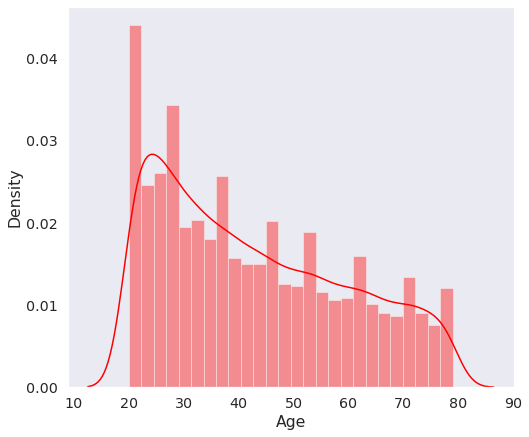

In [10]:
plt.figure(figsize=[8,7])
sns.distplot(final_df['Age'],color='red');

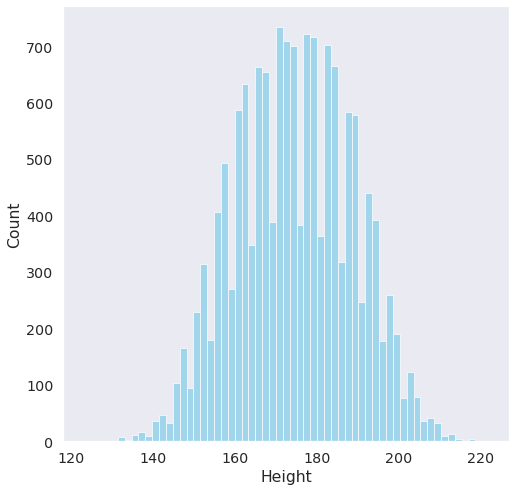

In [11]:
plt.figure(figsize=[8,8])
sns.histplot(final_df['Height'],color='skyblue');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


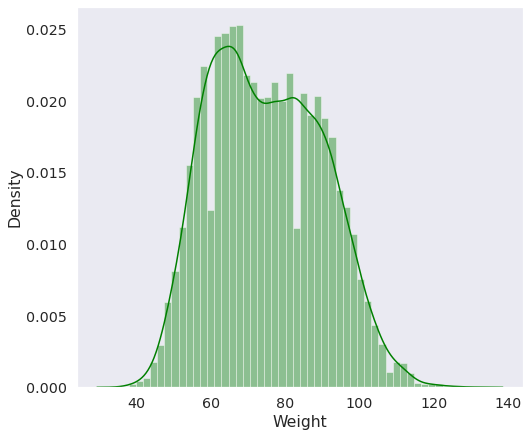

In [12]:
plt.figure(figsize=[8,7])
sns.distplot(final_df['Weight'],color='green');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


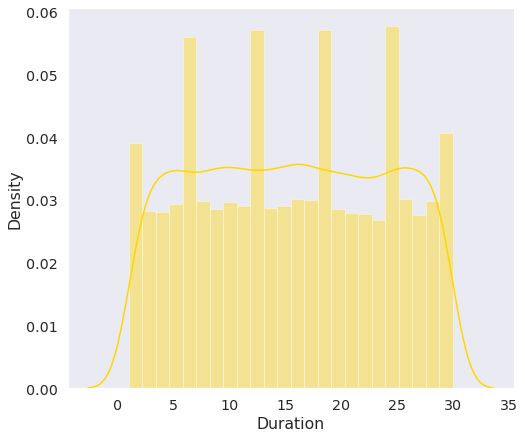

In [13]:
plt.figure(figsize=[8,7])
sns.distplot(final_df['Duration'],color='gold');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


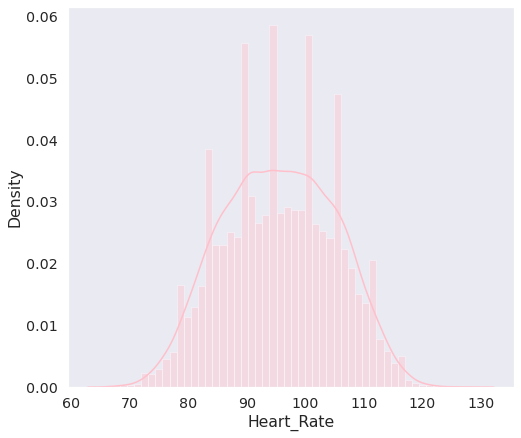

In [14]:
plt.figure(figsize=[8,7])
sns.distplot(final_df['Heart_Rate'],color='pink');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


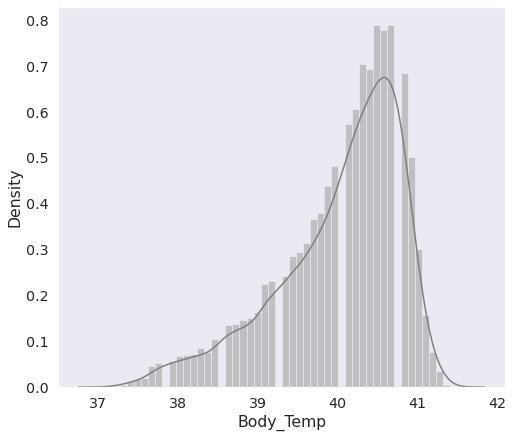

In [15]:
plt.figure(figsize=[8,7])
sns.distplot(final_df['Body_Temp'],color='grey');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


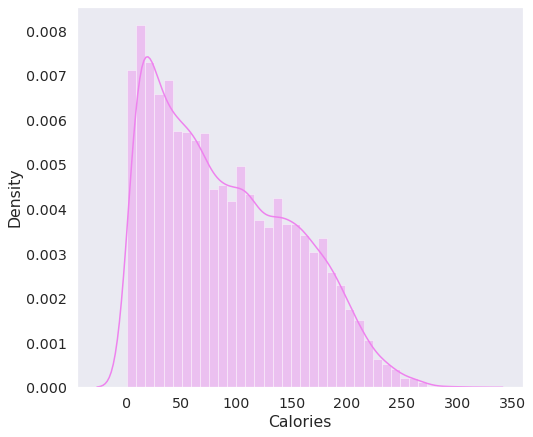

In [16]:
plt.figure(figsize=[8,7])
sns.distplot(final_df['Calories'],color='violet');

*Visualizing for categorical data*

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


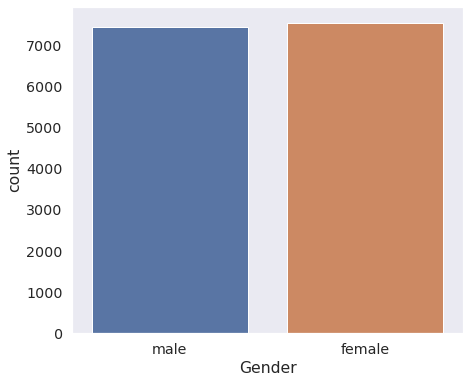

In [17]:
plt.figure(figsize=[7,6])
sns.countplot(final_df['Gender']);

In [18]:
#finding coorealtion
correalation = final_df.corr()
correalation

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Age,-0.001827,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


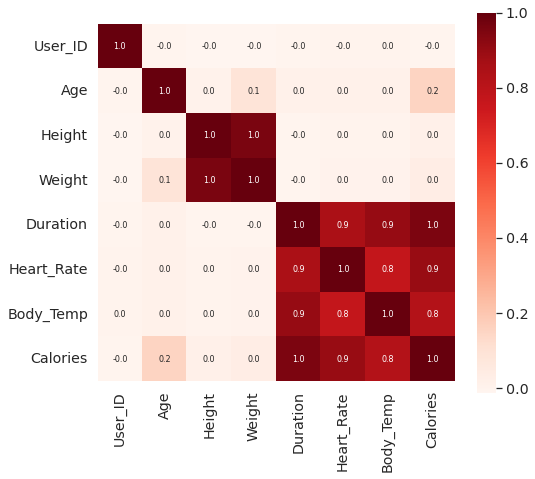

In [19]:
plt.figure(figsize=[8,7])
sns.heatmap(correalation,cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')

From the EDA we get the following insights:
1. The data is evenly distributed for both males and females.
2. For Age the mean value is 42 and the data is positively skewed , most of the datapoints are in between 20 to 50.
3. The Height data is normally distributed with mean of 174cm.
4. The Weight data is also normally distributed with mean of 74 kg.
5. The duration data is a low peaked data with mean of 15mins.
6. The Heart rate column is normally distributed with mean of 95 heart beats with ,several outliers.
7. The temperature column is negatively skewed with mean of 40.
8. From the heatmap we can learn about the correalation between the different aspects.





Converting the Gender data into boolean values to make calculations easier.

In [20]:
final_df.replace({'Gender':{'male':1,'female':0}},inplace=True)
final_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0


Separating the dataset into target and independent variables 

In [21]:
X=final_df.drop(['User_ID','Calories'],axis=1)
Y=final_df['Calories']

In [22]:
print(X,Y)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           1   68   190.0    94.0      29.0       105.0       40.8
1           0   20   166.0    60.0      14.0        94.0       40.3
2           1   69   179.0    79.0       5.0        88.0       38.7
3           0   34   179.0    71.0      13.0       100.0       40.5
4           0   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       0   20   193.0    86.0      11.0        92.0       40.4
14996       0   27   165.0    65.0       6.0        85.0       39.2
14997       0   43   159.0    58.0      16.0        90.0       40.1
14998       1   78   193.0    97.0       2.0        84.0       38.3
14999       1   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns] 0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999   

Splitting the dataset for training and testing.

In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.25,random_state=3)

Training the model

In [43]:
#here we are using the XGBregressor
model = LinearRegression()

In [44]:
model.fit(X_train,Y_train)

LinearRegression()

**Predicting using X_test then calculating the effectiveness of the model using mean squared error from sklearn metrics.**

In [45]:
predictions=model.predict(X_test)
predictions

array([172.04742694, 112.4328336 ,  68.11180273, ..., 137.56235516,
       101.57125701,  -5.43293946])

In [46]:
MAE=metrics.mean_absolute_error(Y_test,predictions)
print("Mean absolute error is {}".format(MAE))

Mean absolute error is 8.567326462522502


we got a good score which means our model is efficient.

## Building a predictive system

normal

In [61]:
input_data = (0,62,159,59,29,106,41)
i1=np.asarray(input_data)
i2=i1.reshape(1,-1)
i2
predictions= model.predict(i2)
print("The calories you burnt is {}".format(predictions))

The calories you burnt is [191.64756623]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Taking input from user

In [64]:
# taking multiple inputs at a time separated by comma
x = [int(x) for x in input("Enter the following values in the given order:Gender(1 if male and 0 if female),Age,Height(in cm),Weight(in kg),Duration(in minutes),Heart_Rate(),Body Temperature(in celcius)").split(",")]
x=np.asarray(x)
x=x.reshape(1,-1)
predictions= model.predict(x)
print("The calories you burnt is {}".format(predictions))

Enter the following values in the given order:Gender(1 if male and 0 if female),Age,Height(in cm),Weight(in kg),Duration(in minutes),Heart_Rate(),Body Temperature(in celcius)0,62,159,59,29,106,41
The calories you burnt is [191.64756623]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
